<a href="https://colab.research.google.com/github/Rousbill/Artificial-Intelligence/blob/main/Askisi_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd

path1 =r'/content/drive/My Drive/winequality-red.csv'
path2= r'/content/drive/My Drive/winequality-white.csv'

# Read the data into a DataFrame
data_red = pd.read_csv(path1,sep=';')
data_white = pd.read_csv(path2,sep=';')

data_red.head()
x=data_red.sum()

#Normalizing dataframe
data_red =(data_red-data_red.mean())/data_red.std()
data_white = (data_white-data_white.mean())/data_white.std()

data_red_dropped=pd.read_csv(path1,sep=';')
data_red_dropped.drop(['quality'],axis=1,inplace=True)
#Normalizing dataframe
data_red_dropped =(data_red_dropped-data_red_dropped.mean())/data_red_dropped.std()

columns1=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
data_red_dropped = pd.DataFrame(data_red_dropped, columns = columns1)

print(data_red.columns)

Mounted at /content/drive
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


-0.1966476023043702
0.15595149727965213


<Axes: >

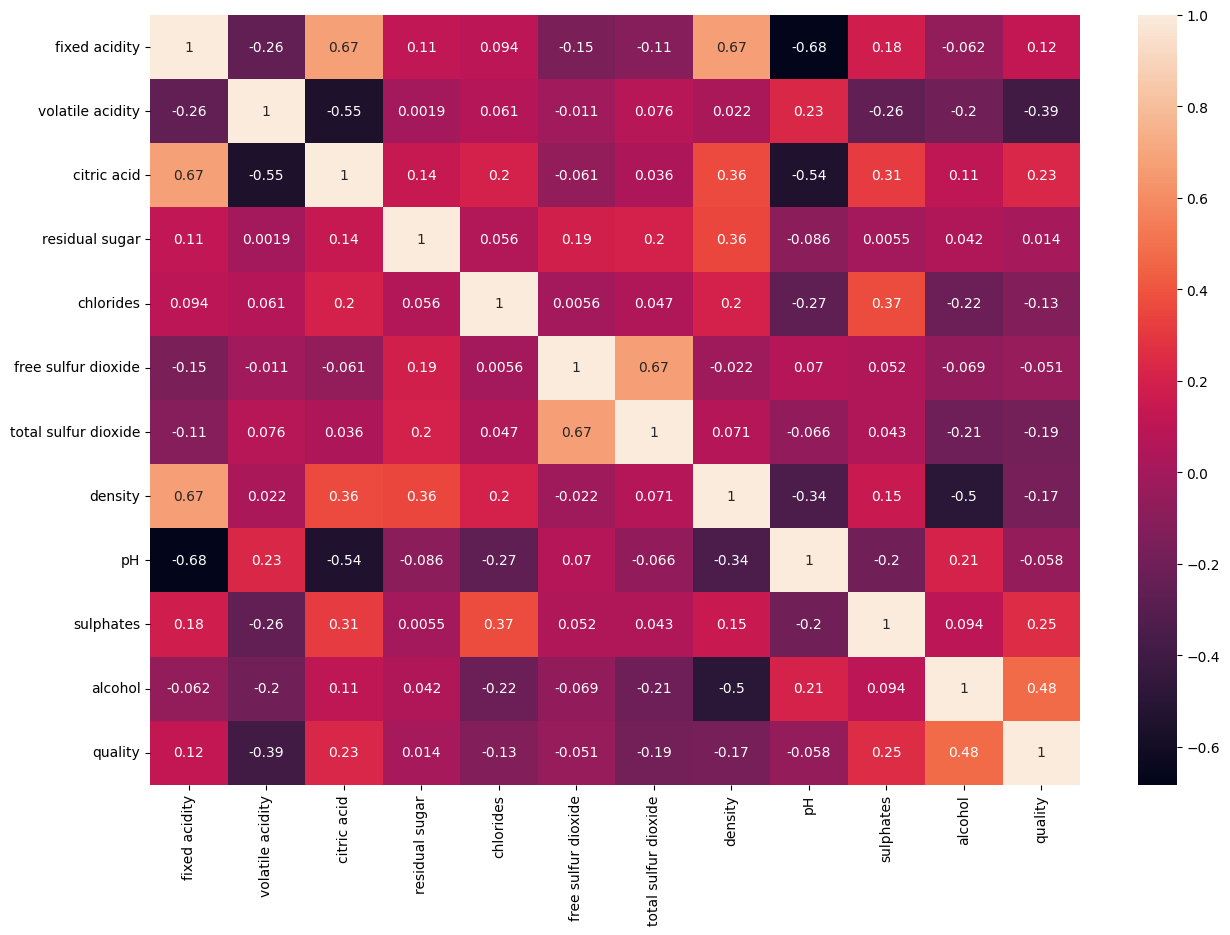

In [ ]:
# 1 Erwthma
import seaborn as sns
import matplotlib.pyplot as plt
# correlation between pH and sulphates
print(data_red['pH'].corr(data_red['sulphates']))
print(data_white['pH'].corr(data_white['sulphates']))

corr_red=data_red.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_red, annot = True)

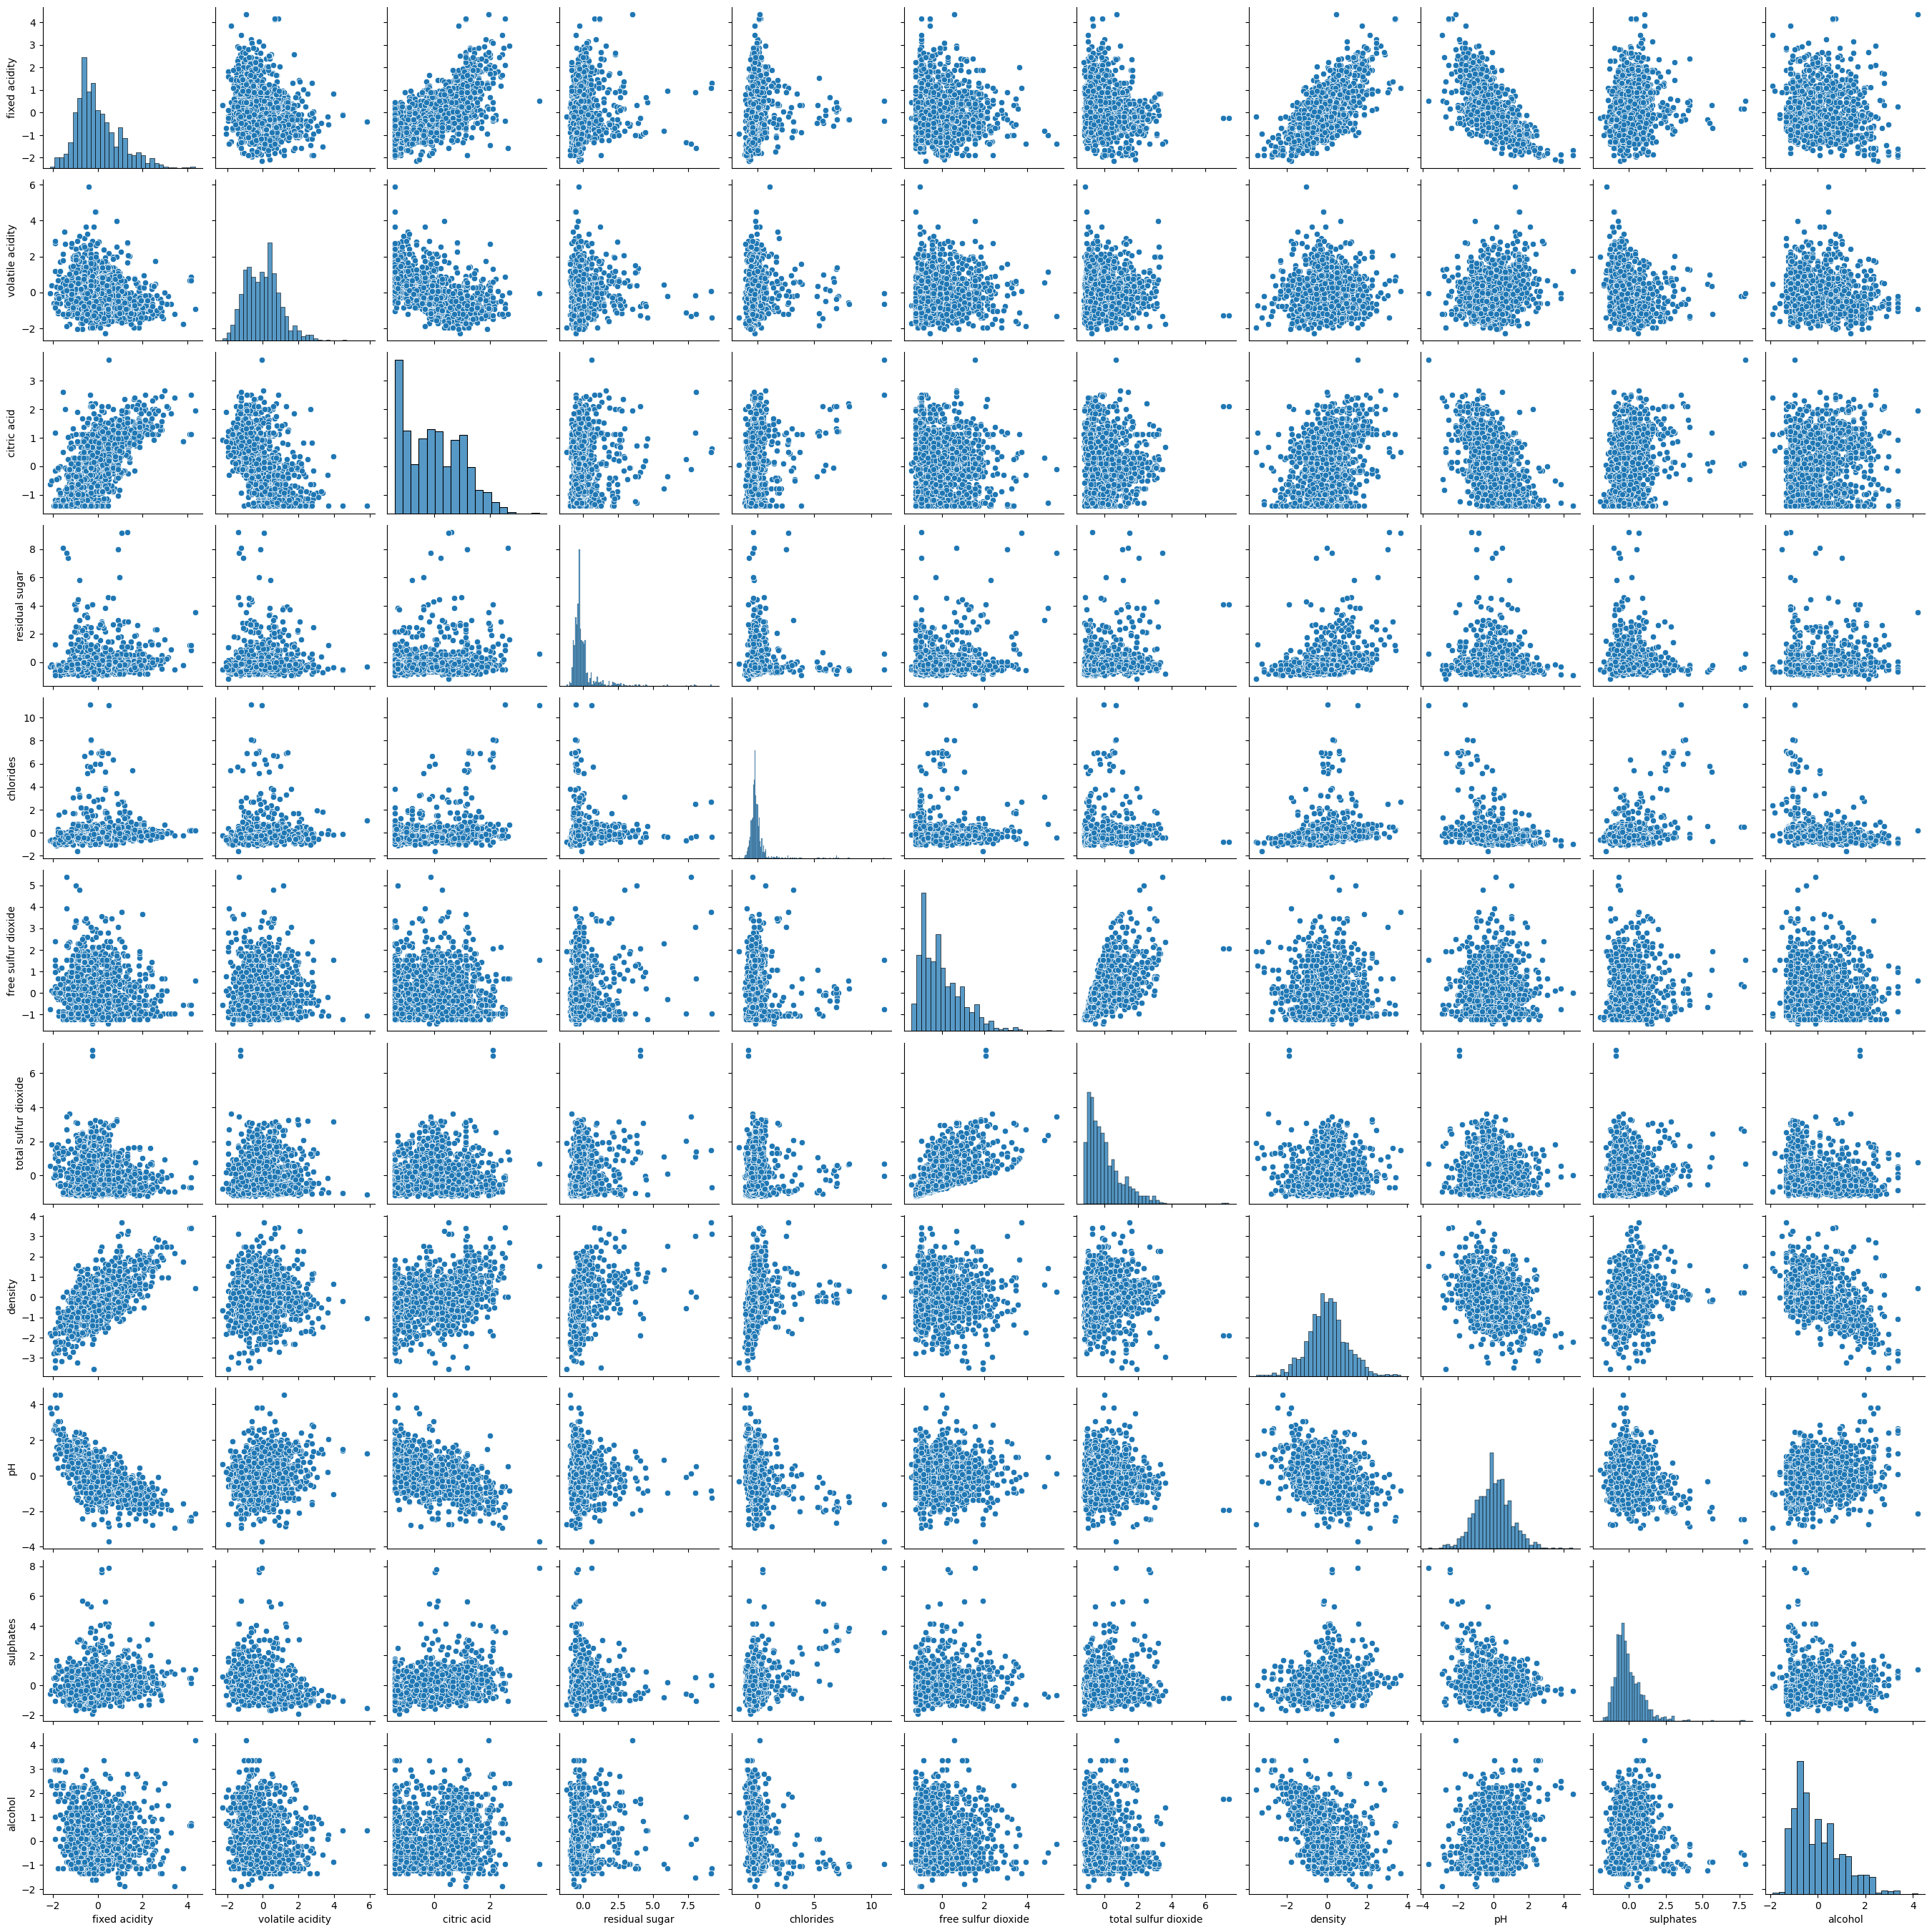

In [ ]:
sns.pairplot(data_red_dropped)

<Axes: >

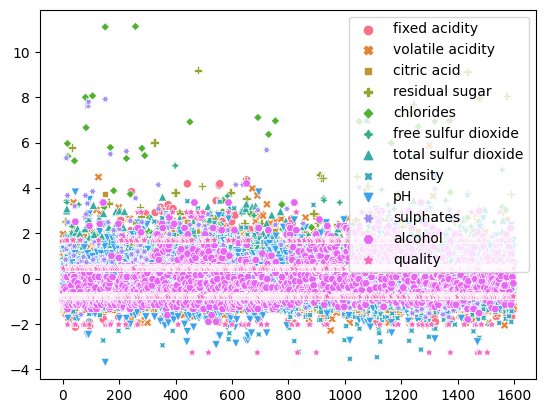

In [ ]:
sns.scatterplot(data_red)

<Axes: >

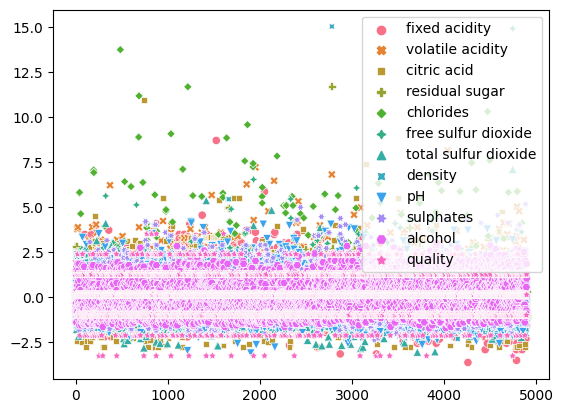

In [ ]:
sns.scatterplot(data_white)

In [ ]:
#2 Erwthma
from sklearn.model_selection import train_test_split
data_red_train=data_red_dropped[:100]
data_red_test=data_red_dropped[100:150]
data_white_test=data_white[:100]
data_white_test=data_white[100:150]

In [ ]:
y=data_red[['quality']]
X=data_red_train


def least_squares(X, y):
    n = len(X)
    X_mean = X.mean()
    y_mean = y.mean()

    X_centered = X - X_mean
    y_centered = y - y_mean

    beta = np.sum(X_centered * y_centered) / (np.sum(X_centered * X_centered))
    alpha = y_mean - beta * X_mean

    return beta, alpha

beta, alpha = least_squares(X, y)
print('Coefficients:')
print('beta:', beta)
print('alpha:', alpha)


Coefficients:
beta: alcohol                 0.0
chlorides               0.0
citric acid             0.0
density                 0.0
fixed acidity           0.0
free sulfur dioxide     0.0
pH                      0.0
quality                 NaN
residual sugar          0.0
sulphates               0.0
total sulfur dioxide    0.0
volatile acidity        0.0
dtype: float64
alpha: alcohol                NaN
chlorides              NaN
citric acid            NaN
density                NaN
fixed acidity          NaN
free sulfur dioxide    NaN
pH                     NaN
quality                NaN
residual sugar         NaN
sulphates              NaN
total sulfur dioxide   NaN
volatile acidity       NaN
dtype: float64


In [ ]:
#B Erwthma
y=data_red['quality'][:100].to_numpy()
X=data_red_train.to_numpy()

t1=(X.transpose()).dot(X)
t1=np.linalg.inv(t1)
w=t1.dot(X.transpose()).dot(y)
print(w)

[ 0.20263355 -0.42745785 -0.33182736 -0.00666482 -0.00822139  0.26989156
 -0.31150589 -0.08632161 -0.19337537  0.01986753  0.42410443]


In [ ]:
#3o Erwthma
l=10
t10=(X.transpose()).dot(X)+l*np.identity(11)
t10=np.linalg.inv(t10)
w10=(t10.dot(X.transpose())).dot(y)

l=100
t100=(X.transpose()).dot(X)+l*np.identity(11)
t100=np.linalg.inv(t100)
w100=t100.dot(X.transpose()).dot(y)

l=200
t200=(X.transpose()).dot(X)+l*np.identity(11)
t200=np.linalg.inv(t200)
w200=t200.dot(X.transpose()).dot(y)

print(w10,w100,w200)

[ 0.18100526 -0.32868145 -0.21136088  0.00315369 -0.0201447   0.2002103
 -0.26544658 -0.07116475 -0.16396317  0.01485601  0.3575844 ] [ 1.06643279e-01 -1.35159394e-01 -1.25980983e-02  9.67580914e-03
 -3.10310593e-02  4.47488377e-02 -1.22761568e-01 -1.76582600e-02
 -7.54460925e-02 -1.17437405e-04  1.68243124e-01] [ 0.07466493 -0.08964552  0.00828884  0.00740269 -0.02662986  0.01904825
 -0.08078191 -0.00758947 -0.0492262  -0.0027821   0.10948051]


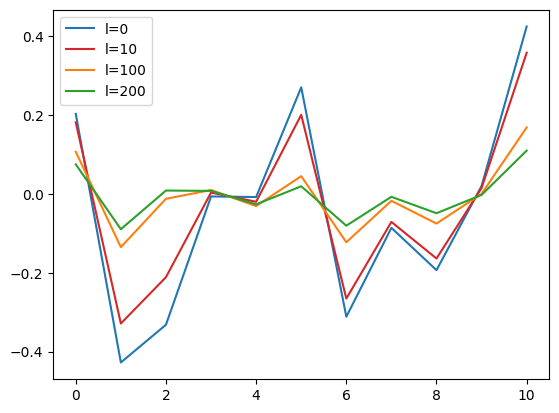

In [ ]:
#D Erwthma
import matplotlib.pyplot as plt

# plot the data
x1=np.arange(11)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x1, w, color='tab:blue', label='l=0')
ax.plot(x1, w10, color='tab:red',label='l=10')
ax.plot(x1, w100, color='tab:orange',label='l=100')
ax.plot(x1, w200, color='tab:green',label='l=200')

plt.legend(loc='upper left')

In [ ]:
#E Erwthma
#Root Mean Squared Error (RMSE)
#Gia train set

#l=0, train
e=np.zeros(100)
for row in range (len(X)):
  e[row]=(y[row]-w.dot(X[row]))**2
RMSE_0= np.sqrt(e.sum()/100)
print(RMSE_0)

#l=10, train
e=np.zeros(100)
for row in range (len(X)):
  e[row]=(y[row]-w10.dot(X[row]))**2
RMSE_10= np.sqrt(e.sum()/100)
print(RMSE_10)

#l=100, train
e=np.zeros(100)
for row in range (len(X)):
  e[row]=(y[row]-w100.dot(X[row]))**2
RMSE_100= np.sqrt(e.sum()/100)
print(RMSE_100)

#l=200, train
e=np.zeros(100)
for row in range (len(X)):
  e[row]=(y[row]-w200.dot(X[row]))**2
RMSE_200= np.sqrt(e.sum()/100)
print(RMSE_200)

0.7028132752311497
0.7111241708320247
0.7957673175676454
0.8353321881019873


In [ ]:
# Gia test set

#l=0, test
X=data_red_test.to_numpy()
y=data_red['quality'][100:150].to_numpy()

e=np.zeros(50)
for row in range (len(X)):
  e[row]=(y[row]-w.dot(X[row]))**2
RMSE_test_0= np.sqrt(e.sum()/50)
print(RMSE_test_0)

#l=10, test
e=np.zeros(50)
for row in range (len(X)):
  e[row]=(y[row]-w10.dot(X[row]))**2
RMSE_test_10= np.sqrt(e.sum()/50)
print(RMSE_test_10)

#l=100, test
e=np.zeros(50)
for row in range (len(X)):
  e[row]=(y[row]-w100.dot(X[row]))**2
RMSE_test_100= np.sqrt(e.sum()/50)
print(RMSE_test_100)

#l=200, test
e=np.zeros(50)
for row in range (len(X)):
  e[row]=(y[row]-w200.dot(X[row]))**2
RMSE_test_200= np.sqrt(e.sum()/50)
print(RMSE_test_200)

0.7527185205544517
0.6374535570302119
0.5481248086613633
0.5856538540298639


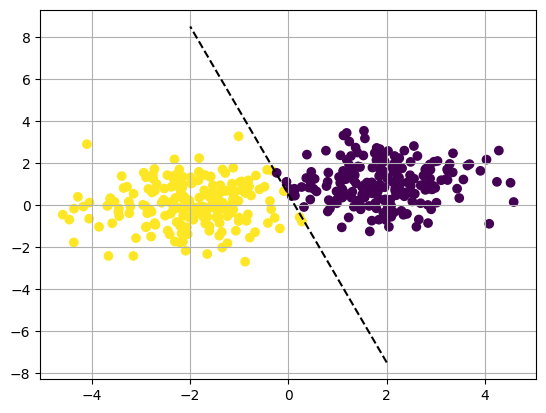

The decision line is: y = -4x + 0.5


In [ ]:
# ASKISI 1.3
import numpy as np
import matplotlib.pyplot as plt

# Define the means
mu1 = np.array([-2, 0])
mu2 = np.array([2, 1])

# Define the covariance matrix
Sigma = np.identity(2)

# Generate some data
x1 = np.random.multivariate_normal(mu1, Sigma, 200)
x2 = np.random.multivariate_normal(mu2, Sigma, 200)

# Calculate the Euclidean distances for each point
D11 = np.sum((x1 - mu1)**2, axis=1)
D12 = np.sum((x1 - mu2)**2, axis=1)
D21 = np.sum((x2 - mu1)**2, axis=1)
D22 = np.sum((x2 - mu2)**2, axis=1)

# Assign each point to the class with the smaller Euclidean distance
y1 = np.where(D11 < D12, 1, 0)
y2 = np.where(D21 < D22, 1, 0)

# Plot the data and the decision line
plt.scatter(x1[:, 0], x1[:, 1], c=y1)
plt.scatter(x2[:, 0], x2[:, 1], c=y2)

# Calculate the perpendicular bisector
w = mu2 - mu1
v = np.array([-w[1], w[0]])
p = (mu1 + mu2) / 2
t = np.linspace(-2, 2, 100)[:, np.newaxis]  # Reshape t to have the same dimensions as v
x = p + t * v

plt.plot(x[:, 0], x[:, 1], 'k--')
plt.grid()
plt.show()
print("The decision line is: y = {}x + {}".format(-w[0], p[1]))

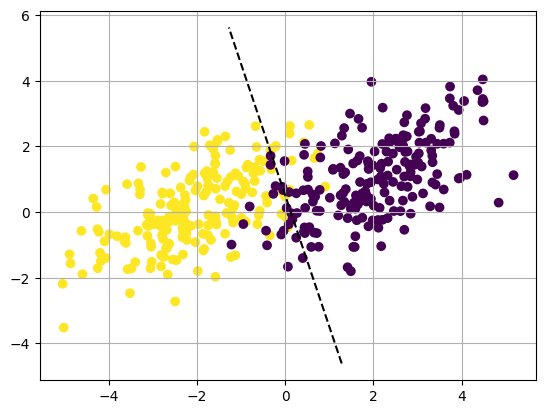

The decision line is: y = -2.56x + 0.5


In [ ]:
# ASKISI 1.3
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Define the means
mu1 = np.array([-2, 0])
mu2 = np.array([2, 1])

# Define the covariance matrix
Sigma = [[1,-0.6],[-0.6,1]]
Sigma=np.linalg.inv(Sigma)

# Generate some data
x1 = np.random.multivariate_normal(mu1, Sigma, 200)
x2 = np.random.multivariate_normal(mu2, Sigma, 200)

xm1=x1 - mu1
xm1=xm1.transpose()
xm12=x1 - mu2
xm12=xm12.transpose()
xm2=x2 - mu2
xm2=xm2.transpose()
xm21=x2 - mu1
xm21=xm21.transpose()

# Calculate the Mahalanobis distances for each point
#D11=distance.mahalanobis(x1, mu1, Sigma)
D11 = np.sum(((x1 - mu1).dot(Sigma)).dot(xm1), axis=1)
D12 = np.sum(((x1 - mu2).dot(Sigma)).dot(xm12), axis=1)
D21 = np.sum(((x2 - mu1).dot(Sigma)).dot(xm21), axis=1)
D22 = np.sum(((x2 - mu2).dot(Sigma)).dot(xm2), axis=1)

# Assign each point to the class with the smaller Machalanobis distance
y1 = np.where(D11 < D12, 1, 0)
y2 = np.where(D21 < D22, 1, 0)

# Plot the data and the decision line
plt.scatter(x1[:, 0], x1[:, 1], c=y1)
plt.scatter(x2[:, 0], x2[:, 1], c=y2)

# Calculate the perpendicular bisector
w = (mu2 - mu1)/np.linalg.det(Sigma)
v = np.array([-w[1], w[0]])
p = (mu1 + mu2) / 2
#p=mu1-mu2-mu1*w
t = np.linspace(-2, 2, 100)[:, np.newaxis]  # Reshape t to have the same dimensions as v
x = p + t * v

plt.plot(x[:, 0], x[:, 1], 'k--')
plt.grid()
plt.show()
print("The decision line is: y = {}x + {}".format(-w[0], p[1]))

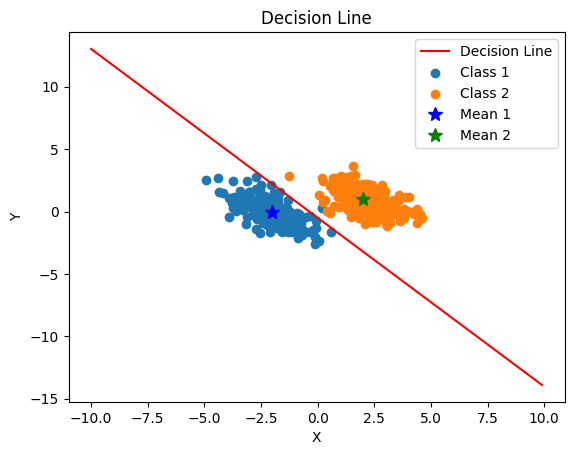

The decision line is: y = -1.3529411764705883x + -0.5


In [ ]:
#Askisi 1.3 B
import numpy as np
import matplotlib.pyplot as plt

# Define the means and covariance matrix
mu1 = np.array([-2, 0])
mu2 = np.array([2, 1])
Sigma = np.array([[1, -0.6], [-0.6, 1]])

# Calculate the inverse of the covariance matrix
Sigma_inv = np.linalg.inv(Sigma)

# Calculate the mahalanobis distance for all points in the range [-10, 10] x [-10, 10]
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)

X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        point = np.array([X[i, j], Y[i, j]])
        mahalanobis_distance = np.sqrt((point - mu1).T @ Sigma_inv @ (point - mu1))
        Z[i, j] = mahalanobis_distance

# Calculate the optimal decision line
w = Sigma_inv @ (mu2 - mu1)
b = -0.5 * (mu1.T @ Sigma_inv @ mu1) + 0.5 * (mu2.T @ Sigma_inv @ mu2)

# Generate the set of points
points = np.random.multivariate_normal(mu1, Sigma, 200)
points2 = np.random.multivariate_normal(mu2, Sigma, 200)

# Plot the mahalanobis distance, decision line and set of points
#plt.contour(X, Y, Z, levels=20)

x_line = np.arange(-10, 10, 0.1)
y_line = (-w[0] * x_line - b) / w[1]

plt.plot(x_line, y_line, 'r', label='Decision Line')

plt.scatter(points[:, 0], points[:, 1], label='Class 1')
plt.scatter(points2[:, 0], points2[:, 1], label='Class 2')

plt.plot(mu1[0], mu1[1], 'b*', markersize=10, label='Mean 1')
plt.plot(mu2[0], mu2[1], 'g*', markersize=10, label='Mean 2')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Line')
plt.legend()
plt.show()
print("The decision line is: y = {}x + {}".format(-w[0]/w[1], -b/w[1]))

The decision line is: y = -1.5159093068438543x + -0.573914194186156


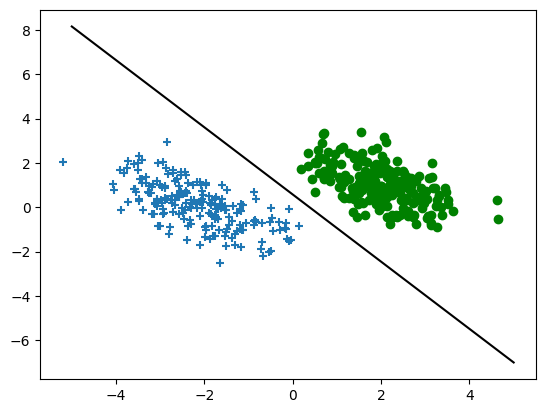

In [ ]:
#Askisi 1.3 b
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import scipy
from sklearn import svm


mu_vec1 = np.array([-2,0])
cov_mat1 = np.array([[1,-0.6],[-0.6,1]])
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 200)
mu_vec1 = mu_vec1.reshape(1,2).T # to 1-col vector

mu_vec2 = np.array([2,1])
cov_mat2 = np.array([[1,-0.6],[-0.6,1]])
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 200)
mu_vec2 = mu_vec2.reshape(1,2).T


fig = plt.figure()


plt.scatter(x1_samples[:,0],x1_samples[:,1], marker='+')
plt.scatter(x2_samples[:,0],x2_samples[:,1], c= 'green', marker='o')

X = np.concatenate((x1_samples,x2_samples), axis = 0)
Y = np.array([0]*200 + [1]*200)

C = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel = 'linear',  gamma=0.7, C=C )
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
b=(clf.intercept_[0]) / w[1]
yy = a * xx - b

plt.plot(xx, yy, 'k-')

print("The decision line is: y = {}x + {}".format(a, b))

The decision line is: y = -1.3529411764705883x + -0.8695252366004809


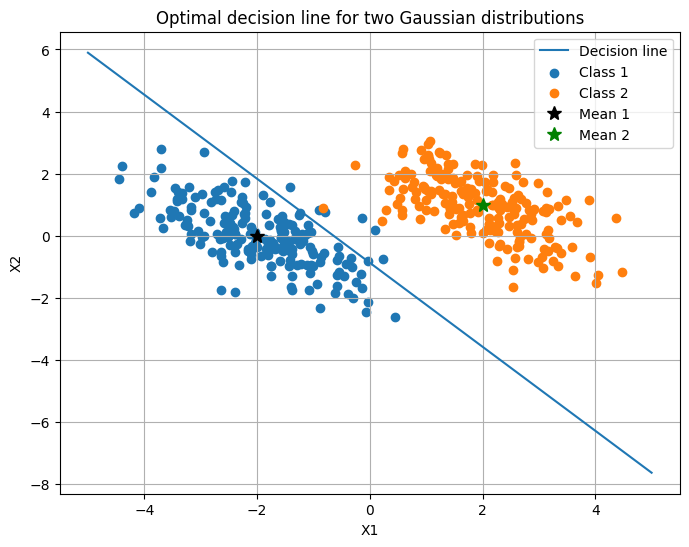

In [ ]:
#1.3 C
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
# Define the means and covariance matrix
mu1 = np.array([-2, 0])
mu2 = np.array([2, 1])
Sigma = np.array([[1, -0.6], [-0.6, 1]])

# Define the sorting errors
lambda12 = 1
lambda21 = 1/2

# Calculate the optimal decision line
w = np.linalg.inv(Sigma) @ (mu2 - mu1)
b = mu2 @ np.linalg.inv(Sigma) @ mu2 - mu1 @ np.linalg.inv(Sigma) @ mu1 + np.log(lambda21 / lambda12)

# Print the decision line in equation form
print("The decision line is: y = {}x + {}".format((-w[0])/w[1], (-b)/w[1]))
# Generate 100 samples from each Gaussian distribution
X1 = multivariate_normal(mu1, Sigma).rvs(200)
X2 = multivariate_normal(mu2, Sigma).rvs(200)

# Plot the decision line, the sets of points and their means
plt.figure(figsize=(8, 6))

# Plot the decision line
x = np.linspace(-5, 5, 100)
y = (-w[0] * x - b) / w[1]
plt.plot(x, y, label='Decision line')

# Plot the sets of points
plt.scatter(X1[:, 0], X1[:, 1], label='Class 1')
plt.scatter(X2[:, 0], X2[:, 1], label='Class 2')

# Plot the means
plt.plot(mu1[0], mu1[1], 'k*', markersize=10, label='Mean 1')
plt.plot(mu2[0], mu2[1], 'g*', markersize=10, label='Mean 2')

# Add labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Optimal decision line for two Gaussian distributions')
plt.grid()
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Askisi 1.3 C
import numpy as np

Sigma = np.array([[1, -0.6], [-0.6, 1]])
Sigma_inv = np.linalg.inv(Sigma)

delta_mu = np.array([-2, 0]) - np.array([2, 1])
delta_mu = np.reshape(delta_mu, (2, 1))

lambda12 = 1
lambda21 = 0.5
w = lambda12 * Sigma_inv @ delta_mu
a = -w[0] / w[1]

b = -0.5 * np.transpose(delta_mu) @ Sigma_inv @ delta_mu + np.log(lambda21 / lambda12)

def decision_line(x):
    return np.transpose(w) @ x + b

x = np.array([1, 1])
y = decision_line(x)
print("The decision line is: y = {}x + {}".format(a, b/w[1]))


The decision line is: y = [-1.35294118]x + [[3.33635712]]


In [ ]:
# Define the means
mu1 = np.array([[-2, 0],[2,1]])
mu1=mu1.transpose()
mu2 = np.array([[1, 0],[0,1]])
mu2=mu2.transpose()
alpha=np.linalg.lstsq(mu1, mu2, rcond=None)[0]
print(alpha)
print("The decision line is: y = {}x + {}".format(alpha[0], alpha[1]))

[[-5.00000000e-01  1.00000000e+00]
 [-4.14721869e-17  1.00000000e+00]]
The decision line is: y = [-0.5  1. ]x + [-4.14721869e-17  1.00000000e+00]


In [ ]:
#B Erwthma
mean=[-2,0,2]
S=[[1,0.8,0.5],[0.8,2,1],[0.5,1,3]]
x, y = np.random.multivariate_normal(mean, S, 2)
print(x,y)
S12=[0.5,1]
S22=[[3]]
S22_inv=t1=np.linalg.inv(S22)
mean12=[-2,0]
mean_b_er=mean12+S12*(S22_inv)*(1-2)
print('b erwtha mean12= ',mean_b_er)

S11=[[1,0.8],[0.8,2]]
S21=[[0.5], [1]]
S_B_ER=S11-S12*S22_inv*S21
print(S_B_ER)

[-2.0244251  -0.00945911  3.33329725] [-2.37943860e+00  6.85034758e-04  1.31212786e+00]
b erwtha mean12=  [[-2.16666667 -0.33333333]]
[[0.91666667 0.63333333]
 [0.63333333 1.66666667]]


In [ ]:
#G Erwthma
import numpy as np
m13=[-2,2]
S13=[0.8,1]
S33=[[2]]
S33_inv=np.linalg.inv(S33)
mean_13=m13+S13*(S33_inv)*(1-0)
print('g erwtha mean13= ',mean_13)
S11=[[1, 0.5],[0.5,3]]
S31=[[0.8],[1]]
S_G_ER=S11-S13*S33_inv*S31
print('S=',S_G_ER)


g erwtha mean13=  [[-1.6  2.5]]
S= [[0.68 0.1 ]
 [0.1  2.5 ]]


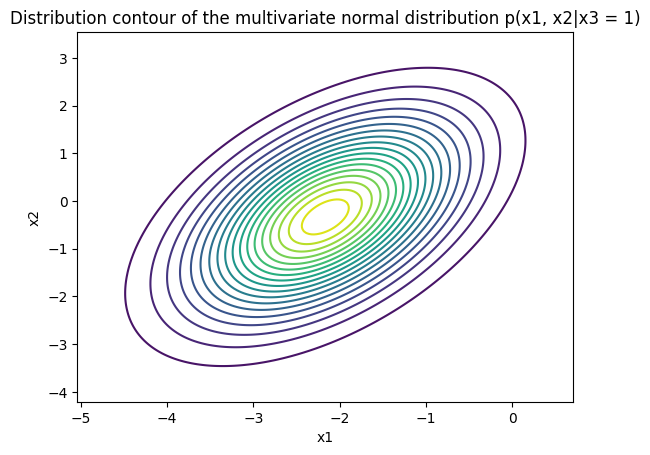

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mean12=[-2.16666667 ,-0.33333333]
#mean = mean12.transpose()
rv = multivariate_normal(mean12, S_B_ER)

std_dev = np.sqrt(np.diag(S_B_ER))

# Determine the x and y ranges
x_range = np.linspace(mean12[0] - 3 * std_dev[0], mean12[0] + 3 * std_dev[0], 200)
y_range = np.linspace(mean12[1] - 3 * std_dev[1], mean12[1] + 3 * std_dev[1], 200)

# Create a grid of points
X, Y = np.meshgrid(x_range, y_range)

# Compute the probability density function at each point
Z1 = rv.pdf(np.array([X, Y]).T)

# Create the contour plot
plt.contour(X, Y, Z1, levels=20)

# Add labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Distribution contour of the multivariate normal distribution p(x1, x2|x3 = 1)')

# Show the plot
plt.show()

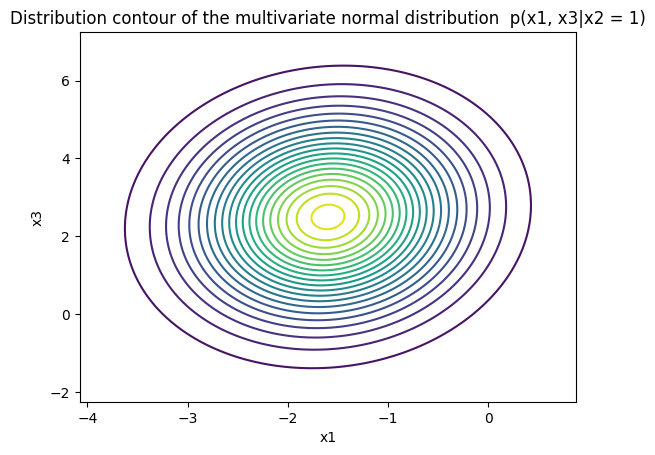

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

mean13=[-1.6, 2.5]
#mean = mean13.transpose()
rv = multivariate_normal(mean13, S_G_ER)

std_dev = np.sqrt(np.diag(S_G_ER))

# Determine the x and y ranges
x_range = np.linspace(mean13[0] - 3 * std_dev[0], mean13[0] + 3 * std_dev[0], 200)
y_range = np.linspace(mean13[1] - 3 * std_dev[1], mean13[1] + 3 * std_dev[1], 200)

# Create a grid of points
X, Y = np.meshgrid(x_range, y_range)

# Compute the probability density function at each point
Z2 = rv.pdf(np.array([X, Y]).T)

# Create the contour plot
plt.contour(X, Y, Z2, levels=20)

# Add labels and title
plt.xlabel('x1')
plt.ylabel('x3')
plt.title('Distribution contour of the multivariate normal distribution  p(x1, x3|x2 = 1)')

# Show the plot
plt.show()

<ipython-input-42-8bdae401e1df>:2: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,Z1, levels=20,label=' p(x1, x2|x3 = 1)')
<ipython-input-42-8bdae401e1df>:3: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X,Y,Z2, levels=20,label='p(x1, x3|x2 = 1)')


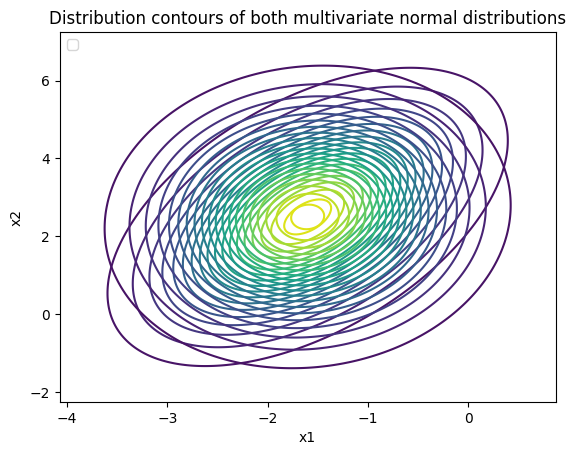

In [ ]:
# Create the contour plot
plt.contour(X,Y,Z1, levels=20,label=' p(x1, x2|x3 = 1)')
plt.contour(X,Y,Z2, levels=20,label='p(x1, x3|x2 = 1)')

# Add labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Distribution contours of both multivariate normal distributions')
plt.legend(loc='upper left')

# Show the plot
plt.show()

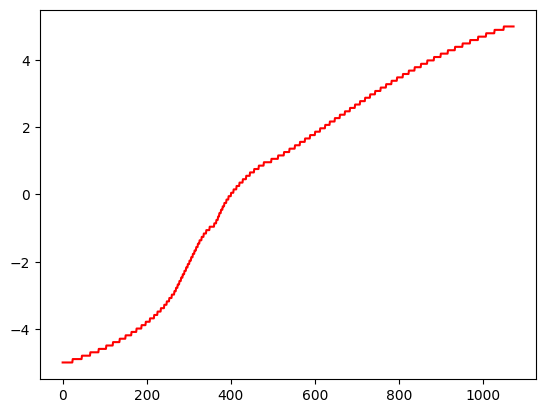

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Define mean vectors
m1 = [-2, 0]
m2 = [2, 1]

# Assume equal covariance matrix
S = np.array([[1, 0], [0, 1]])

# Create multivariate normal distributions
dist1 = multivariate_normal(m1, S)
dist2 = multivariate_normal(m2, S)

# Define a grid of points to evaluate the PDFs
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_range, y_range)

# Evaluate the PDFs at each point
Z1 = dist1.pdf(np.array([X, Y]).T)
Z2 = dist2.pdf(np.array([X, Y]).T)

# Find the decision boundary points
decision_boundary_points = []
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if np.abs(Z1[i, j] - Z2[i, j]) < 1e-6:
            decision_boundary_points.append([X[i, j], Y[i, j]])

# Convert decision boundary points to numpy array
decision_boundary_points = np.array(decision_boundary_points)

# Plot the decision boundary
#plt.contour(X, Y, Z1, levels=10)
#plt.contour(X, Y, Z2, levels=10)
plt.plot(decision_boundary_points[:, 1], 'r-')
plt.show()

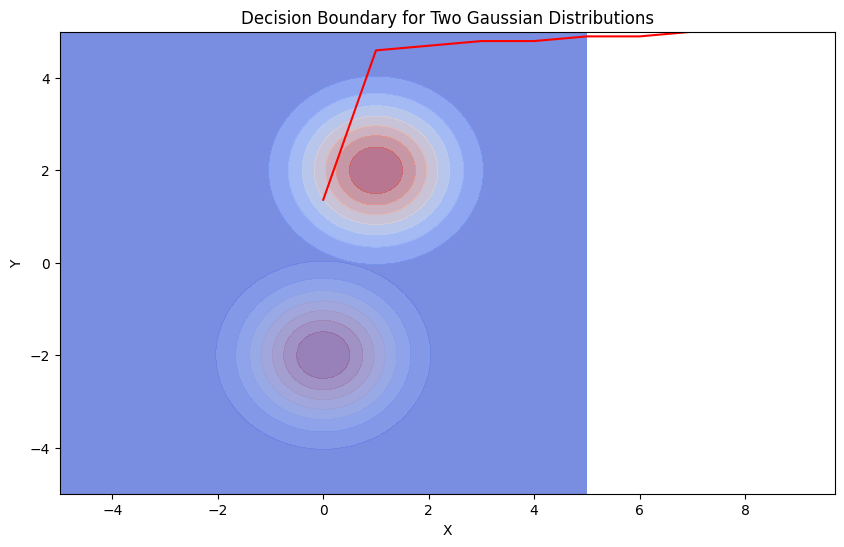

[(-5.0, 1.3636363636363633), (-5.0, 4.595959595959595), (-5.0, 4.696969696969697), (-5.0, 4.797979797979798), (-4.898989898989899, 4.797979797979798), (-5.0, 4.8989898989899), (-4.898989898989899, 4.8989898989899), (-5.0, 5.0), (-4.898989898989899, 5.0), (-4.797979797979798, 5.0)]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define mean vectors
m1 = np.array([-2, 0])
m2 = np.array([2, 1])

# Assume equal covariance matrix
S = np.array([[1, 0], [0, 1]])

# Create multivariate normal distributions
dist1 = multivariate_normal(m1, S)
dist2 = multivariate_normal(m2, S)

# Define a grid of points to evaluate the PDFs
x_range = np.linspace(-5, 5, 100)
y_range = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_range, y_range)

# Evaluate the PDFs at each point
Z1 = dist1.pdf(np.array([X, Y]).T)
Z2 = dist2.pdf(np.array([X, Y]).T)

# Find the decision boundary points
decision_boundary_points = []
for i in range(len(X)):
    for j in range(len(Y)):
        if np.abs(Z1[i, j] - Z2[i, j])<1e-10:
            decision_boundary_points.append((X[i, j], Y[i, j]))

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z1, cmap='coolwarm', alpha=0.5)
plt.contourf(X, Y, Z2, cmap='coolwarm', alpha=0.5)
#plt.plot(decision_boundary_points)
plt.plot([point[1] for point in decision_boundary_points], 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundary for Two Gaussian Distributions')
plt.show()
print(decision_boundary_points)


In [ ]:
#Askisi 1.4
import numpy as np
w0 = np.array([1,0,0,0])
w1 = np.array([1,4,3,6])
w2 = np.array([1,2,-2,3])
w3 = np.array([1,1,0,-3])
w4 = np.array([1,4,2,3])

x0 = np.array([0,0,0])
x1 = np.array([4,3,6])
x2 = np.array([2,-2,3])
x3 = np.array([1,0,-3])
x4 = np.array([4,2,3])

x_arr = np.array([x1,x2,x3,x4])
c = 0
start = True
check = False
t_arr = np.array([-1,1,1,-1])

w_arr = np.array([w1,w2,w3,w4])
y = x0.dot(x1) + 1
adj = 0
def step(x):
  if x >= 0:
    return 1
  else:
    return -1
while check == False:
  print("------------ ",c," ------------")
  x = x_arr[c%4]
  print("x = ", x)
  t = t_arr[c%4]
  print("t = ", t)
  if start:
    w = x0
    start = False
  else:
    w = w_new
  y = w.dot(x) + 1
  print("y = w * x = ", y)
  delta = t - step(y)
  print("δ = t - f(y) = ", delta)
  w_new = w + delta*x
  if (w_new == w).all() and c > 4:
    if adj >= 4:
      check = True
      w_final = np.array([1,w_new[0],w_new[1],w_new[2]])
      print("Finished, final weight w is: ", w_final)
    else:
      print("w = w + δ * x = ", w_new)

    adj = adj+1
    c = c+1
    print("adj = ", adj)

  else:
    adj = 0
    c = c+1
    print("w = w + δ * x = ", w_new)

------------  0  ------------
x =  [4 3 6]
t =  -1
y = w * x =  1
δ = t - f(y) =  -2
w = w + δ * x =  [ -8  -6 -12]
------------  1  ------------
x =  [ 2 -2  3]
t =  1
y = w * x =  -39
δ = t - f(y) =  2
w = w + δ * x =  [ -4 -10  -6]
------------  2  ------------
x =  [ 1  0 -3]
t =  1
y = w * x =  15
δ = t - f(y) =  0
w = w + δ * x =  [ -4 -10  -6]
------------  3  ------------
x =  [4 2 3]
t =  -1
y = w * x =  -53
δ = t - f(y) =  0
w = w + δ * x =  [ -4 -10  -6]
------------  4  ------------
x =  [4 3 6]
t =  -1
y = w * x =  -81
δ = t - f(y) =  0
w = w + δ * x =  [ -4 -10  -6]
------------  5  ------------
x =  [ 2 -2  3]
t =  1
y = w * x =  -5
δ = t - f(y) =  2
w = w + δ * x =  [  0 -14   0]
------------  6  ------------
x =  [ 1  0 -3]
t =  1
y = w * x =  1
δ = t - f(y) =  0
w = w + δ * x =  [  0 -14   0]
adj =  1
------------  7  ------------
x =  [4 2 3]
t =  -1
y = w * x =  -27
δ = t - f(y) =  0
w = w + δ * x =  [  0 -14   0]
adj =  2
------------  8  ------------
x =  [4 3 6]
